# Task 1

In [1]:
# import Library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#import data
insurances_df = pd.read_csv("D:\Data Science\Course 9\DS2_C6_S1_Insurance_Data_Challenge.csv")
insurances_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Task 2

In [3]:
#check shape of the data
insurances_df.shape

(1338, 7)

In [4]:
#description of data
insurances_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Task 3

In [5]:
# checking that is there any null value or not
insurances_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values no required to treatment of null values 

In [6]:
insurances_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
insurance_df_c = insurances_df

# Task 4

In [8]:
# change data type as categorical
insurance_df_c["sex"] = insurance_df_c["sex"].astype("category")
insurance_df_c["smoker"] = insurance_df_c["smoker"].astype("category")
insurance_df_c["region"] = insurance_df_c["region"].astype("category")

In [9]:
insurance_df_c.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [10]:
# change data type as numerical
label_encoder = preprocessing.LabelEncoder()
insurance_df_c['sex_encode']= label_encoder.fit_transform(insurance_df_c['sex'])
insurance_df_c["bmi_encode"]= label_encoder.fit_transform(insurance_df_c["bmi"])
insurance_df_c["smoker_encode"] = label_encoder.fit_transform(insurance_df_c["smoker"])
insurance_df_c["region_encode"] = label_encoder.fit_transform(insurance_df_c["region"])


In [11]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  new_insurance_df = insurance_df_c.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  df_scaled = pd.DataFrame(scaler.fit_transform(new_insurance_df.to_numpy()),columns=new_insurance_df.columns)
  return df_scaled

In [12]:
# scaling the data using MinMax Scaling process
scale = 'minmax' #standard
insurance_df_scaled=feature_scale(scale)
insurance_df_scaled

,age,bmi,children,charges,sex_encode,bmi_encode,smoker_encode,region_encode
0,0.021739,0.321227,0.0,0.251611,0.0,0.360146,1.0,1.000000
1,0.000000,0.479150,0.2,0.009636,1.0,0.639854,0.0,0.666667
2,0.217391,0.458434,0.6,0.053115,1.0,0.605119,0.0,0.666667
3,0.326087,0.181464,0.0,0.333010,1.0,0.133455,0.0,0.333333
4,0.304348,0.347592,0.0,0.043816,1.0,0.407678,0.0,0.333333
...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299,1.0,0.504570,0.0,0.333333
1334,0.000000,0.429379,0.0,0.017305,0.0,0.552102,0.0,0.000000
1335,0.000000,0.562012,0.0,0.008108,0.0,0.771481,0.0,0.666667
1336,0.065217,0.264730,0.0,0.014144,0.0,0.266910,0.0,1.000000


In [13]:
# Finding correlation among numerical features, based on their strong relation we can choose the important features
corr=insurance_df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges,sex_encode,bmi_encode,smoker_encode,region_encode
age,1.000000,0.109272,0.042469,0.299008,-0.020856,0.112052,-0.025019,0.002127
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.990599,0.003750,0.157566
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.011228,0.007673,0.016569
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.202956,0.787251,-0.006208
sex_encode,-0.020856,0.046371,0.017163,0.057292,1.000000,0.044714,0.076185,0.004588
bmi_encode,0.112052,0.990599,0.011228,0.202956,0.044714,1.000000,0.002085,0.155176
smoker_encode,-0.025019,0.003750,0.007673,0.787251,0.076185,0.002085,1.000000,-0.002181
region_encode,0.002127,0.157566,0.016569,-0.006208,0.004588,0.155176,-0.002181,1.000000


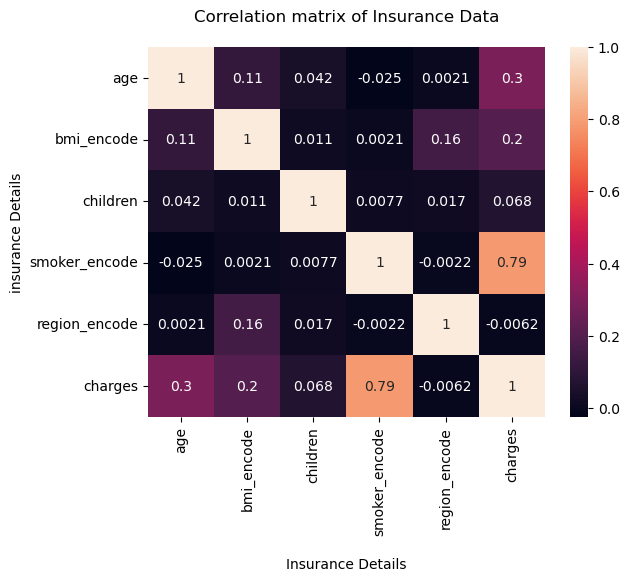

In [14]:
new_df_scaled=insurance_df_scaled[['age','bmi_encode','children','smoker_encode','region_encode','charges']]
hm = sns.heatmap(new_df_scaled.corr(), annot = True)
hm.set(xlabel='\nInsurance Details', ylabel='insurance Details', title = "Correlation matrix of Insurance Data\n")
plt.show()

# Task 5

In [15]:
# splitting dataframe by row index
insurance_df_c= insurances_df
train_num=int(1338*0.7)
insurance_df_train = insurance_df_c.iloc[:train_num,:]
insurance_df_test = insurance_df_c.iloc[(train_num+1):,:]
print("Shape of new dataframes - {} , {}".format(insurance_df_train.shape, insurance_df_test.shape))

Shape of new dataframes - (936, 11) , (401, 11)


In [16]:
# splitting dataframe using train_test_split() built in method
y = insurance_df_c['charges']
X = insurance_df_c
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))

Shape of new dataframes - (936, 11) , (402, 11)


# Task 6

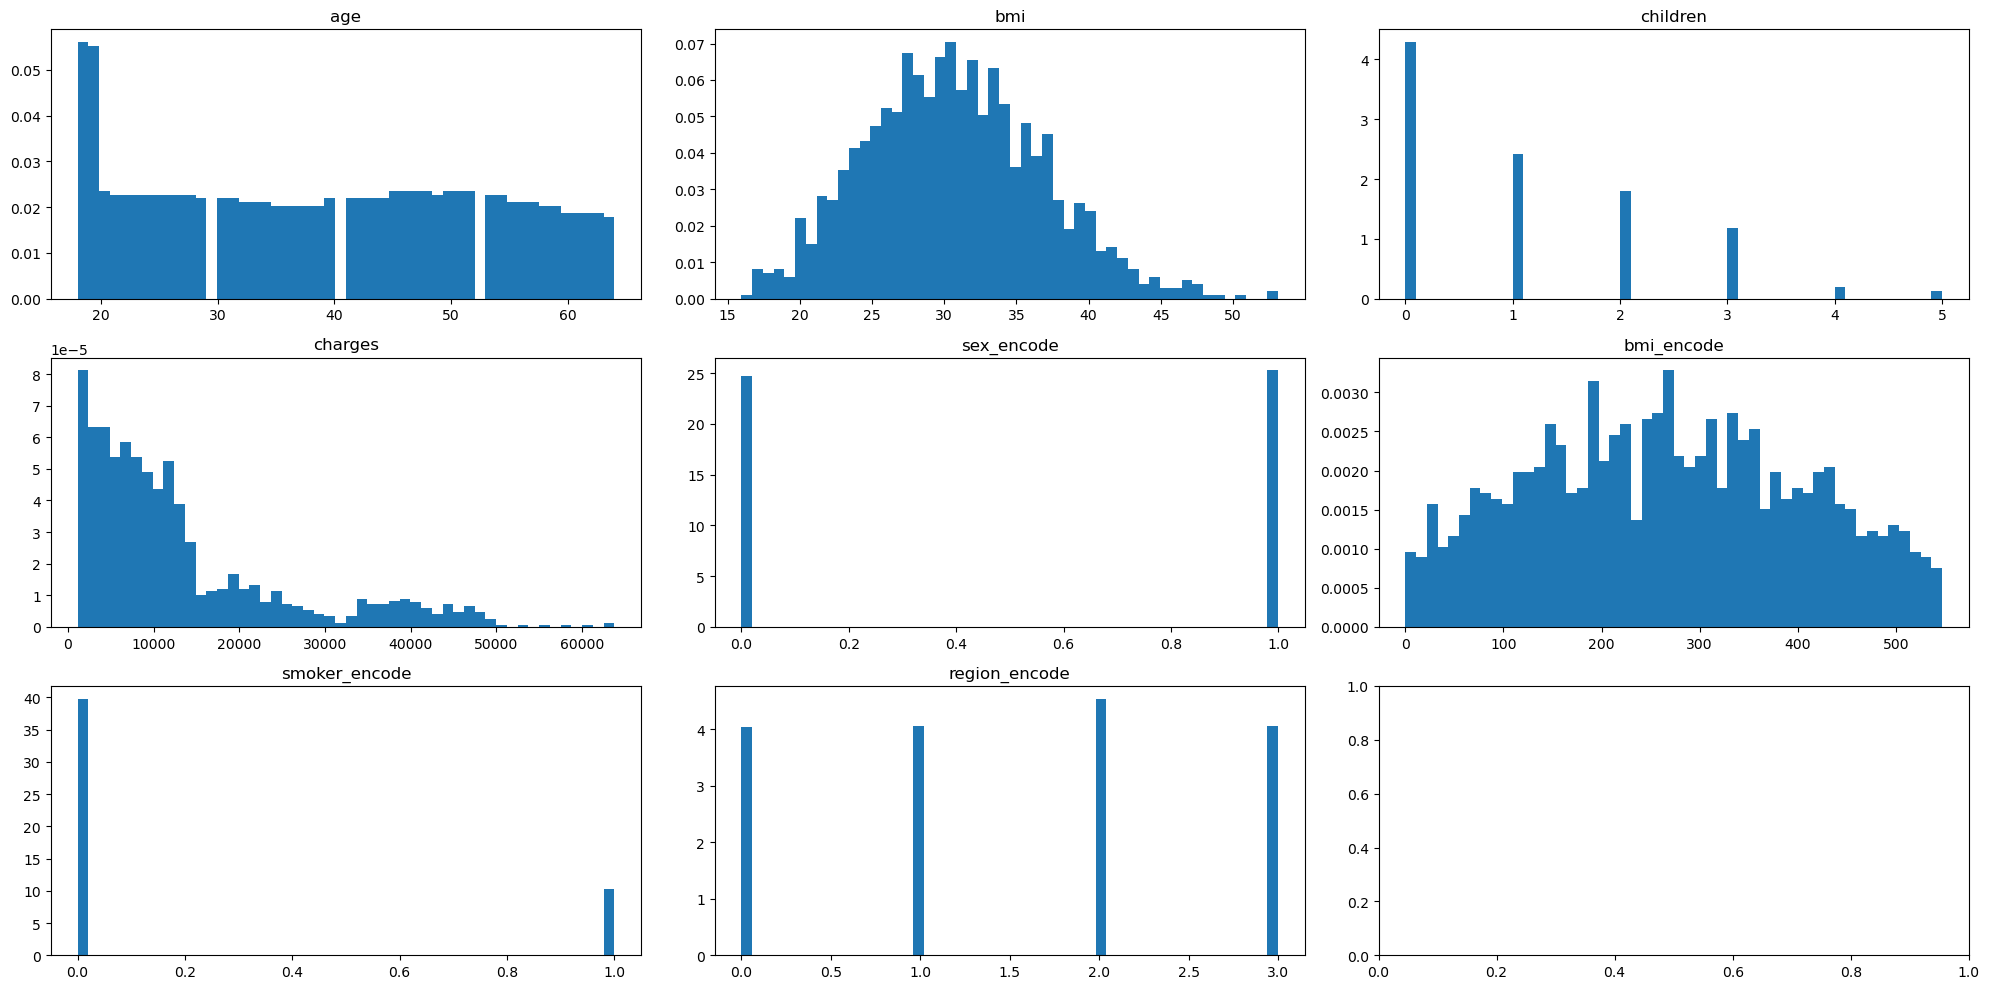

In [22]:
# Histogram of all numerical features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_insurance_df = insurances_df.select_dtypes(include=numerics)
numeric_cols=new_insurance_df.columns
num_cols=3
n_bins = 50

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))

# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_insurance_df[col],bins=n_bins,density=True)
    ax.set_title(col)

plt.show()

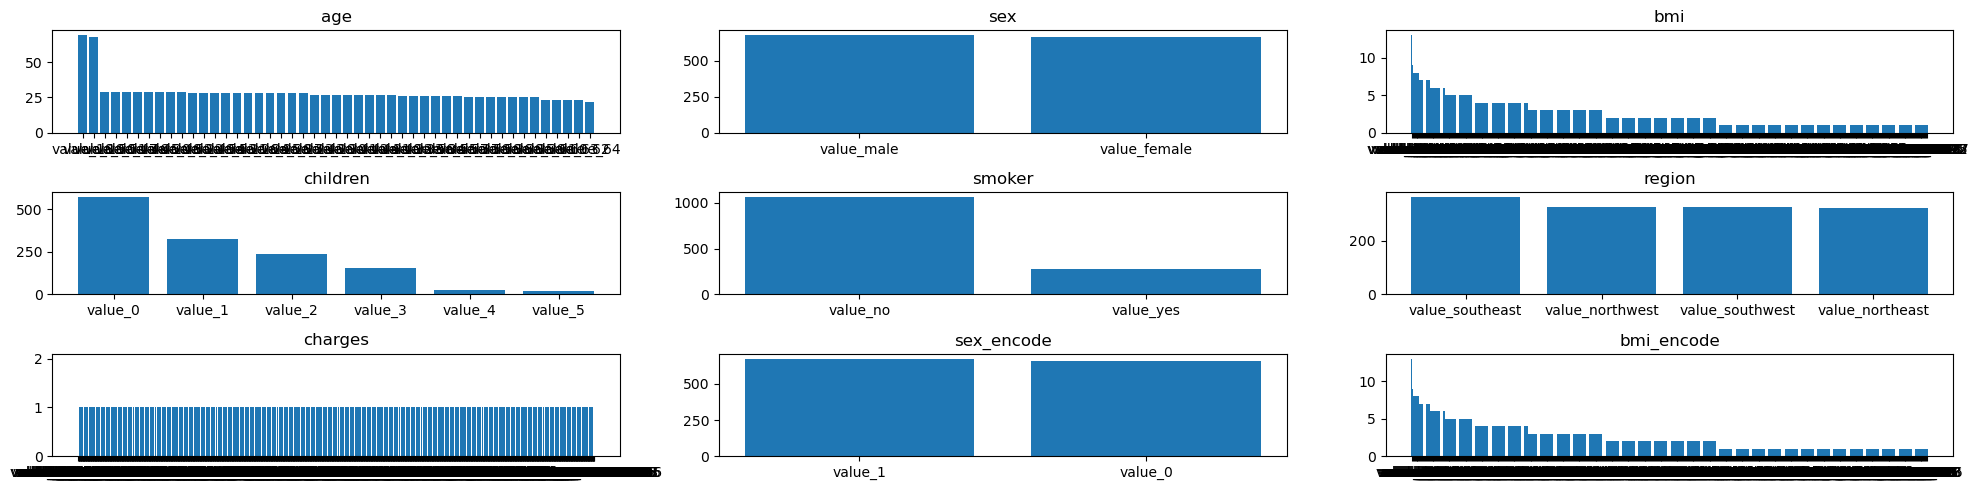

In [23]:
# Histogram of all categorical features
num_cols = 3
cat_insurance_df = insurances_df.select_dtypes('category')
categorical_cols=insurances_df.columns
# compute number of rows for plot 
num_rows= int(len(categorical_cols)/num_cols)

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,5))

# plotting the numerical columns
for col, ax in zip(categorical_cols,axs.flatten()[:len(categorical_cols)]):
    stats = insurances_df[col].value_counts()
    values = list(stats)
    names = list(map(lambda x : ''.join(('value_',str(x))),list(stats.index)))
    ax.bar(names,values)
    ax.set_title(col)
    
plt.show()

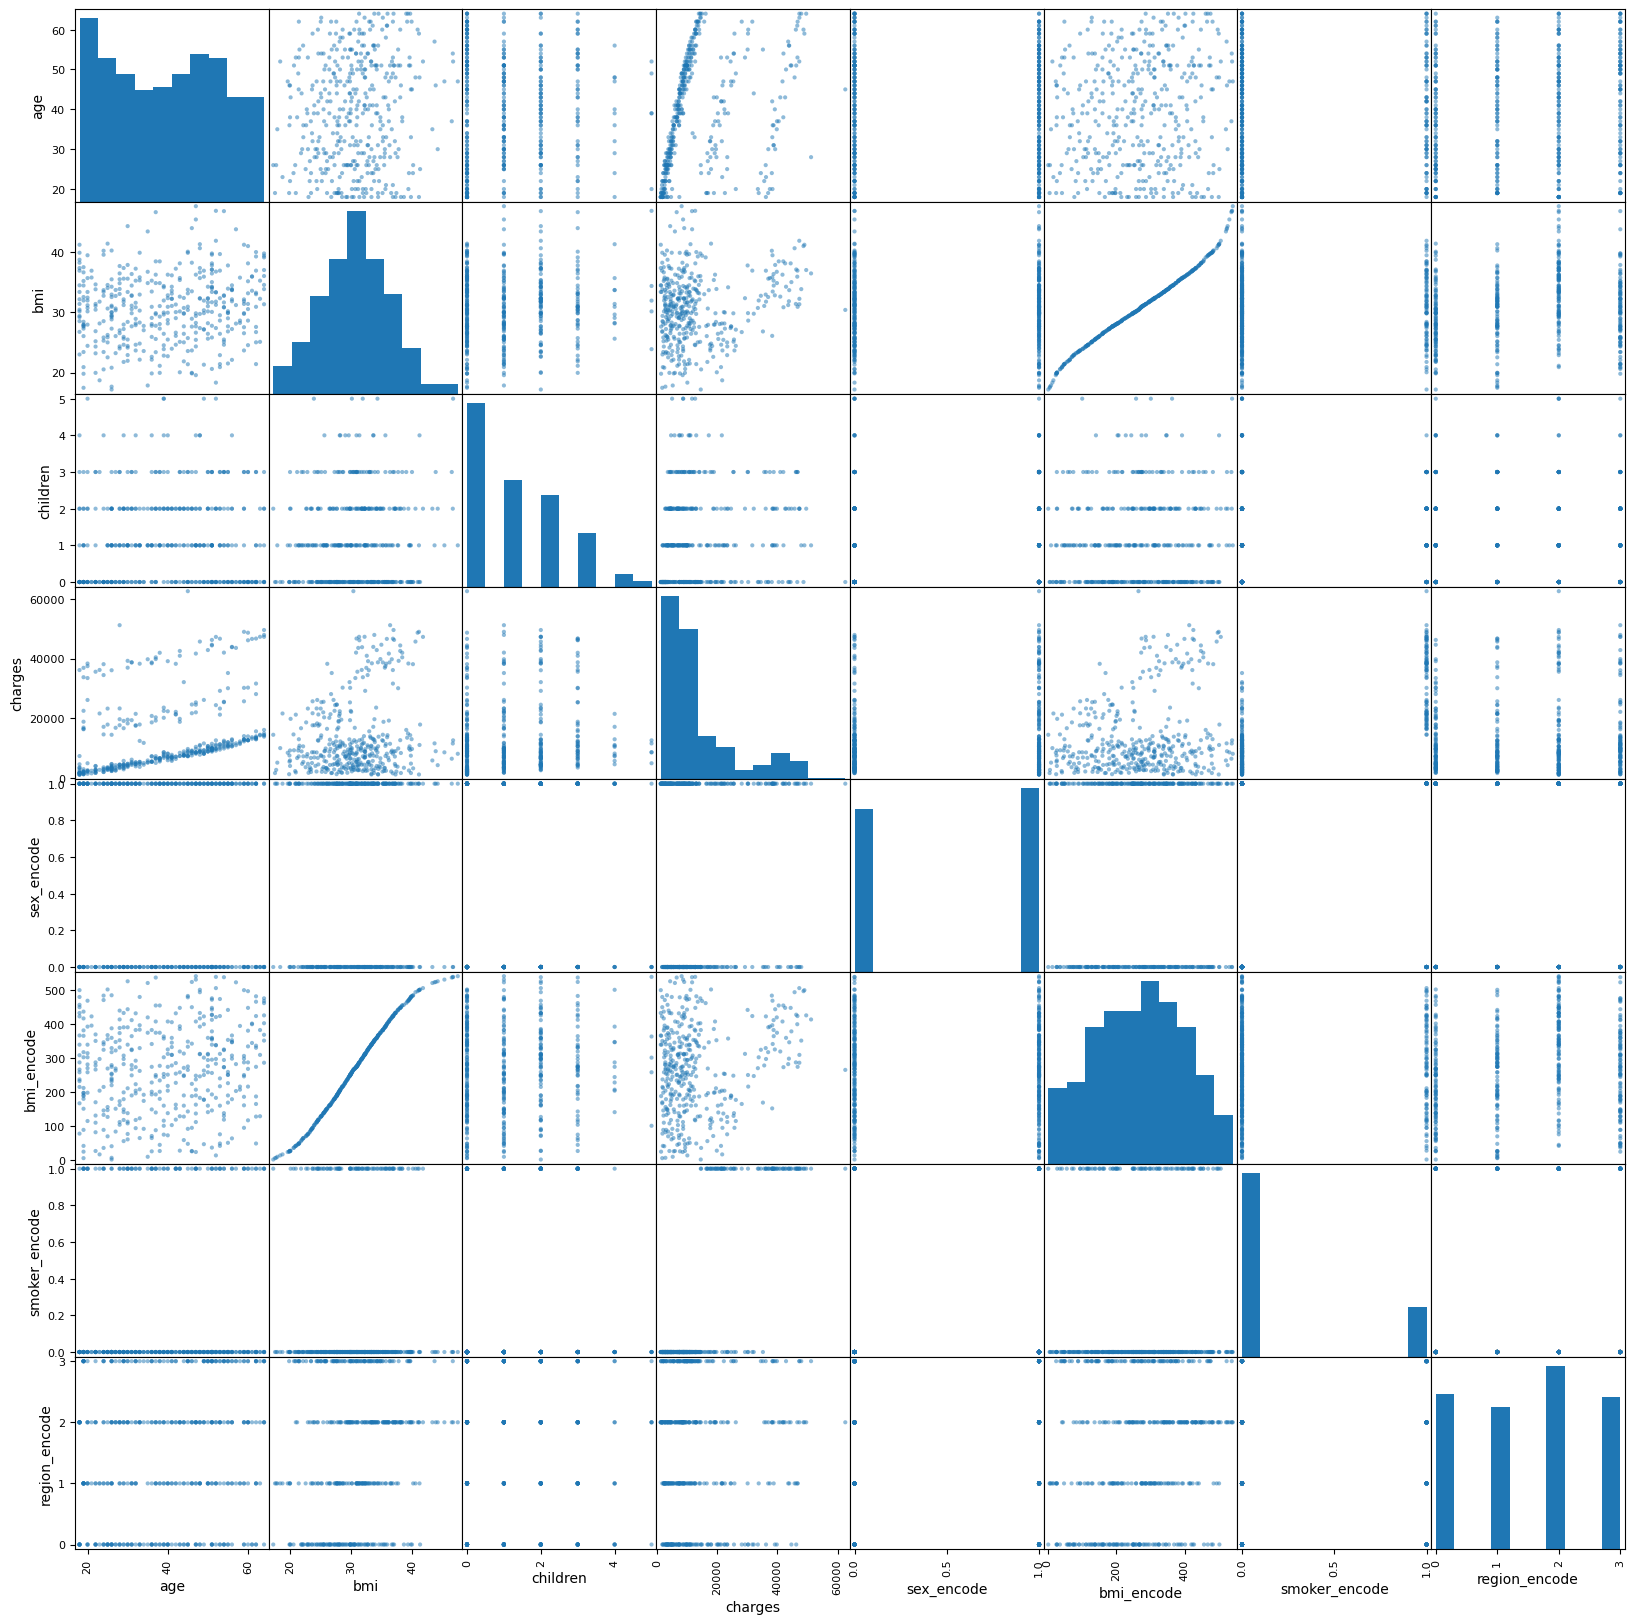

In [25]:
# Scatter Matrix plot of all columns
pd.plotting.scatter_matrix(insurances_df[numeric_cols].sample(400),figsize=(20,20))
plt.show()

[0 1 3 2 5 4]


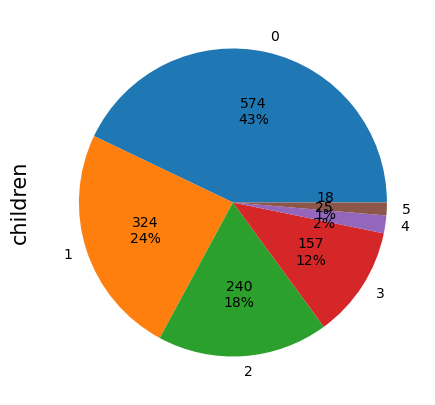

In [26]:
# Pie charts of categorical features
labels=insurance_df_c['children'].unique()
print(labels)
def label_function(val):
    return f'{val / 100 * len(insurance_df_c):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))

insurance_df_c.groupby(insurance_df_c['children']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('children', size=15)
# show plot
plt.show()

 43% people have no children 

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']


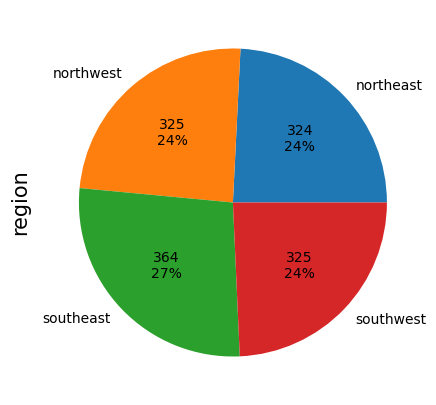

In [27]:
# Pie charts of categorical features
labels=insurance_df_c['region'].unique()
print(labels)
def label_function(val):
    return f'{val / 100 * len(insurance_df_c):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))

insurance_df_c.groupby(insurance_df_c['region']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('region', size=15)
# show plot
plt.show()

In [ ]:
southeast has large number of people as 27%

['yes', 'no']
Categories (2, object): ['no', 'yes']


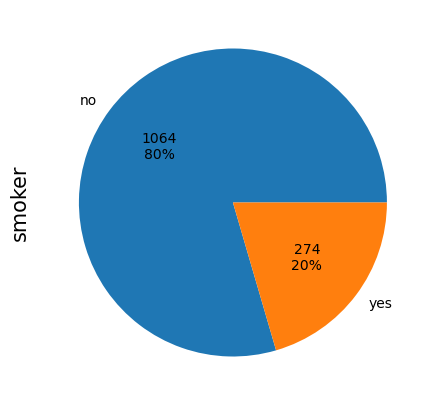

In [28]:
# Pie charts of categorical features
labels=insurance_df_c['smoker'].unique()
print(labels)
def label_function(val):
    return f'{val / 100 * len(insurance_df_c):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))

insurance_df_c.groupby(insurance_df_c['smoker']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('smoker', size=15)
# show plot
plt.show()

80% are smoker